In this notebook the code for my capstone will be nicely explained and commented. Below I will start by extracting the data from the csv files.


In [105]:
import csv
import pandas
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime
from collections import Counter
import random
from statistics import mean


In [106]:
#if any of the used feautures has a NaN value it not be used.
df_sales2 = pandas.read_csv("sales2.csv")
c = df_sales2.columns[0:7]
df_sales = df_sales2.dropna(subset=c)
df_tokens = pandas.read_csv("tokens2.csv")

#every column is converted to a list since it is easier to work with but the index is now important since any change
#could mess up the data
usd_sales = df_sales['usd'].tolist()
tokenId_sales = df_sales['tokenId'].tolist()
timestamp_sales = df_sales['timestamp'].tolist()
buyer_sales = df_sales['buyer'].tolist()
seller_sales = df_sales['seller'].tolist()
rate_sales = df_sales['rate'].tolist()

creator_tokens = df_tokens['creator'].tolist()
tokenId_tokens = df_tokens['tokenId'].tolist()

#example of timestamp_sales
print(timestamp_sales[:5])

['2018-04-05T23:50:12Z', '2020-01-18T16:16:42Z', '2021-01-05T00:47:24Z', '2018-04-05T23:59:06Z', '2018-09-05T21:06:04Z']


Below I will make a basic matrix with only three features as the first three colums, namely the year when the artwork got sold, the month, and the creator. The creator will only be unique when he made 40 or more sales, else he will go in the "other" category.

In [107]:
matrix_basic = np.zeros((len(timestamp_sales),9))

count = 0
#first day something got sold in this dataset. 
first_day = datetime.datetime(2018, 4, 5)

#list with datetime.datetime of sale of every sale
lstdays = []

#list with days since first sale of every sale
lstdays2 = []


for i in timestamp_sales:
    date = i.split("T")[0]
    time = i.split("T")[1][0:-1]
    #getting a datetime format out of timestamps.
    #print(time)
    date2 = datetime.datetime(int(date[0:4]),int(date[5:7]),int(date[8:]),hour = int(time[0:2]),minute = int(time[3:5]), second = int(time[6:]))
    #print(date2)
    date_year = date[:4]
    date_months = date[5:7]
    date_days = date[8:]
    matrix_basic[count][0] = int(date_year) - 2017 
    matrix_basic[count][1] = int(date_months)
    matrix_basic[count][2] = math.ceil(int(date_days)/7)
    #print(str(math.ceil(int(date_days)/7)) + " " + str(date_days))
    delta = date2 - first_day
    daydiff = delta.days
    lstdays.append(date2)
    lstdays2.append(daydiff)
    count = count + 1
#the first 10 dates have been tested 
    
#dict with keys tokens and values creator
dict_toccrea = dict()
countt = 0
for i in tokenId_tokens:
    #print(i)
    #print(len(creator_tokens)) 22232
    dict_toccrea[i] = creator_tokens[countt]
    countt = countt + 1
    
listwcreato = []
for i in tokenId_sales:

    listwcreato.append(dict_toccrea[i])
#print(listwcreato[:12])
dictcrea = dict()

#print(listwcreato)
#listwcreato first 10 have been tested and are correct
countercreator = Counter(listwcreato)
count7 = 0
count7_1 = 2
#if the artist has sold more than 40 artworks he will get an unique vale in the dictionary
for i in listwcreato:
    if countercreator[i] >= 40:
        if i in dictcrea.keys():
            matrix_basic[count7][3] = dictcrea[i]
            count7 = count7 + 1
        else:
            dictcrea[i] = count7_1
            matrix_basic[count7][3] = dictcrea[i]
            count7 = count7 + 1
            count7_1 = count7_1 + 1  
    else:
        matrix_basic[count7][3] = 1
        count7 = count7 + 1
for i in matrix_basic[:,3]:
    print(i)
print(matrix_basic[263,:])
print(matrix_basic[478,:])
print(matrix_basic[1877,:])
#print(listwcreato[260] + "   " + listwcreato[261])
#matrix first three columns are tested and work. 
#print(matrix_basic[:100])
#the value of past artworks sold by the creator.
#source: https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
def duplicates(lst, item):
    lst_dupl = []
    count1 = 0
    for i in lst:
        if i == item:
            lst_dupl.append(count1)
            count1 =count1 +1
        else:
            count1 =count1 +1
    return lst_dupl


count3 = 0
lstwithindx = []
#we got a list with all indexes in the sales.csv file that have the same creator
count231 = 0
for i in listwcreato:
    if i == "0x77350e1152efd5f2d807a6124015c629a907155e":
        #print(count231)
        count231 = count231+1
    else:
        count231 = count231+1
print(listwcreato[263])
print(listwcreato[478])
print(listwcreato[1877])
print(listwcreato[2782])
for i in listwcreato:
    lst = duplicates(listwcreato, i)
    lstwithindx.append(lst)

for i in range(len(lstwithindx)):
    if  3 < len(lstwithindx[i]) < 5:
        r = i
        break
#print(r)
print(lstwithindx[263])
#lstwithindx got tested for the first 11 and it was correct
count4 = 0
value = []
for i in lstwithindx:
    lst12 = []
    for j in i:
        #when the datetime precedes the sale time then it will get added to the list of values. 
        if lstdays[j] < lstdays[count4]:
            lst12.append(usd_sales[j])
            
            #if count < 5:
                #print(str(lstdays[j]) + str(lstdays[count4]))
    count4 =count4+1
    value.append(lst12)
#print(value[:12])
""" 
all works according to plan
print(usd_sales[263])
print(usd_sales[478])
print(usd_sales[1877])
print(usd_sales[2782])

print(timestamp_sales[263])
print(timestamp_sales[478])
print(timestamp_sales[1877])
print(timestamp_sales[2782])


print(value[263])
print(value[478])
print(value[1877])
print(value[2782])
 """ 

2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
4.0
4.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
4.0
4.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
4.0
4.0
4.0
1.0
1.0
1.0
4.0
4.0
5.0
1.0
1.0
1.0
2.0
2.0
4.0
4.0
4.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
4.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
4.0
4.0
1.0
1.0
4.0
4.0
3.0
6.0
6.0
3.0
1.0
1.0
1.0
1.0
1.0
4.0
4.0
7.0
7.0
7.0
7.0
8.0
8.0
9.0
9.0
9.0
9.0
9.0
9.0
8.0
8.0
1.0
8.0
8.0
8.0
8.0
8.0
8.0
7.0
1.0
7.0
8.0
8.0
1.0
1.0
1.0
1.0
9.0
7.0
7.0
9.0
9.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
10.0
10.0
2.0
2.0
2.0
2.0
2.0
2.

36.0
36.0
36.0
1.0
3.0
3.0
29.0
34.0
34.0
21.0
1.0
1.0
27.0
16.0
1.0
40.0
44.0
44.0
1.0
1.0
4.0
32.0
36.0
36.0
45.0
45.0
16.0
3.0
3.0
29.0
29.0
34.0
34.0
34.0
46.0
1.0
44.0
17.0
45.0
27.0
20.0
32.0
41.0
41.0
41.0
36.0
36.0
36.0
17.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
32.0
1.0
25.0
45.0
1.0
34.0
27.0
22.0
20.0
38.0
44.0
35.0
16.0
40.0
45.0
27.0
25.0
25.0
1.0
1.0
20.0
28.0
28.0
32.0
45.0
3.0
3.0
28.0
38.0
36.0
16.0
22.0
22.0
44.0
45.0
45.0
28.0
9.0
47.0
47.0
21.0
21.0
40.0
47.0
34.0
34.0
22.0
9.0
11.0
11.0
21.0
40.0
44.0
1.0
45.0
45.0
34.0
34.0
30.0
27.0
27.0
27.0
38.0
41.0
41.0
41.0
1.0
1.0
41.0
40.0
40.0
45.0
36.0
16.0
3.0
47.0
21.0
21.0
1.0
40.0
29.0
29.0
16.0
17.0
17.0
1.0
1.0
1.0
7.0
41.0
41.0
41.0
41.0
41.0
1.0
45.0
40.0
40.0
25.0
25.0
38.0
38.0
38.0
41.0
41.0
4.0
4.0
45.0
45.0
25.0
25.0
22.0
22.0
44.0
1.0
15.0
41.0
41.0
41.0
41.0
41.0
41.0
1.0
40.0
20.0
20.0
7.0
7.0
1.0
3.0
3.0
9.0
9.0
35.0
35.0
41.0
41.0
41.0
21.0
21.0
47.0
47.0
38.0
38.0
41.0
41.0
41.0
22.0
44.0
45.0
1.0
22.0
11.0
3.0


31.0
30.0
31.0
31.0
61.0
58.0
51.0
51.0
11.0
58.0
1.0
68.0
68.0
68.0
22.0
25.0
71.0
71.0
71.0
46.0
71.0
71.0
31.0
31.0
31.0
31.0
1.0
1.0
44.0
67.0
68.0
68.0
51.0
31.0
68.0
9.0
9.0
31.0
31.0
31.0
47.0
58.0
44.0
65.0
44.0
55.0
56.0
1.0
25.0
25.0
68.0
41.0
44.0
69.0
69.0
55.0
58.0
58.0
58.0
40.0
1.0
1.0
46.0
68.0
41.0
1.0
31.0
31.0
1.0
67.0
67.0
20.0
1.0
41.0
1.0
67.0
46.0
1.0
1.0
68.0
68.0
67.0
62.0
68.0
1.0
1.0
46.0
31.0
31.0
44.0
68.0
38.0
38.0
65.0
66.0
66.0
66.0
66.0
25.0
46.0
32.0
32.0
31.0
38.0
38.0
38.0
31.0
31.0
1.0
71.0
1.0
1.0
1.0
71.0
71.0
32.0
32.0
7.0
71.0
48.0
49.0
3.0
46.0
63.0
63.0
63.0
44.0
56.0
56.0
1.0
1.0
68.0
57.0
21.0
31.0
30.0
30.0
31.0
17.0
68.0
44.0
1.0
1.0
7.0
31.0
31.0
68.0
68.0
31.0
31.0
68.0
1.0
1.0
1.0
1.0
7.0
4.0
4.0
52.0
46.0
1.0
56.0
56.0
56.0
31.0
67.0
31.0
31.0
31.0
48.0
65.0
25.0
1.0
15.0
63.0
46.0
67.0
57.0
41.0
61.0
63.0
46.0
11.0
69.0
1.0
31.0
31.0
31.0
3.0
51.0
68.0
25.0
31.0
68.0
41.0
1.0
1.0
56.0
56.0
38.0
48.0
48.0
3.0
3.0
69.0
54.0
68.0
1.0
59.

1.0
1.0
97.0
1.0
98.0
98.0
1.0
1.0
1.0
1.0
1.0
89.0
103.0
90.0
1.0
100.0
100.0
92.0
1.0
1.0
1.0
46.0
102.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
99.0
1.0
101.0
1.0
93.0
60.0
90.0
93.0
93.0
1.0
103.0
1.0
1.0
96.0
96.0
1.0
1.0
35.0
6.0
1.0
93.0
22.0
64.0
64.0
23.0
23.0
89.0
81.0
81.0
100.0
7.0
40.0
102.0
79.0
68.0
99.0
90.0
103.0
22.0
101.0
27.0
43.0
43.0
92.0
1.0
75.0
75.0
75.0
103.0
57.0
62.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
87.0
68.0
68.0
1.0
99.0
99.0
1.0
1.0
1.0
85.0
1.0
64.0
64.0
64.0
64.0
79.0
63.0
1.0
98.0
98.0
5.0
15.0
84.0
46.0
40.0
1.0
91.0
89.0
1.0
104.0
27.0
27.0
103.0
96.0
59.0
86.0
96.0
62.0
72.0
68.0
75.0
99.0
1.0
105.0
105.0
70.0
1.0
101.0
103.0
81.0
99.0
79.0
1.0
104.0
100.0
100.0
59.0
106.0
69.0
1.0
19.0
19.0
92.0
6.0
6.0
6.0
23.0
97.0
97.0
99.0
99.0
1.0
77.0
1.0
20.0
79.0
1.0
1.0
103.0
46.0
1.0
99.0
6.0
107.0
1.0
1.0
100.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
60.0
1.0
65.0
65.0
65.0
78.0
78.0
78.0
96.0
46.0
82.0
82.0
82.0
1.0
98.0
1.0
104.0
1.0
107.0
1.0
1.0
94.0
84.0
92.0
92.0
96.0
9

115.0
115.0
97.0
97.0
49.0
1.0
1.0
1.0
1.0
99.0
55.0
75.0
1.0
102.0
66.0
84.0
84.0
4.0
22.0
50.0
50.0
33.0
33.0
1.0
106.0
1.0
43.0
43.0
43.0
10.0
1.0
1.0
1.0
91.0
91.0
23.0
1.0
84.0
1.0
111.0
57.0
57.0
57.0
117.0
64.0
64.0
118.0
5.0
5.0
1.0
1.0
116.0
1.0
113.0
109.0
72.0
72.0
1.0
108.0
1.0
1.0
1.0
57.0
57.0
102.0
111.0
111.0
1.0
118.0
103.0
118.0
97.0
1.0
118.0
1.0
117.0
115.0
11.0
1.0
103.0
1.0
24.0
90.0
1.0
1.0
63.0
1.0
1.0
38.0
118.0
1.0
84.0
84.0
72.0
72.0
110.0
68.0
5.0
5.0
113.0
117.0
1.0
1.0
53.0
53.0
53.0
53.0
1.0
1.0
53.0
53.0
53.0
56.0
118.0
118.0
1.0
112.0
24.0
23.0
118.0
1.0
102.0
1.0
103.0
80.0
80.0
5.0
5.0
64.0
81.0
81.0
71.0
71.0
71.0
71.0
1.0
74.0
118.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
118.0
102.0
92.0
1.0
93.0
93.0
93.0
1.0
12.0
108.0
1.0
113.0
5.0
94.0
25.0
85.0
85.0
85.0
118.0
102.0
102.0
107.0
104.0
75.0
75.0
75.0
1.0
46.0
1.0
1.0
103.0
103.0
1.0
115.0
112.0
1.0
1.0
98.0
24.0
52.0
61.0
61.0
61.0
1.0
1.0
1.0
66.0
66.0
66.0
43.0
99.0
113.0
57.0
65.0
66.0
1.0
1.0
1.0
89

116.0
116.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
39.0
1.0
1.0
1.0
111.0
1.0
68.0
1.0
99.0
15.0
1.0
64.0
104.0
90.0
90.0
1.0
35.0
1.0
1.0
60.0
1.0
1.0
17.0
17.0
1.0
1.0
1.0
1.0
70.0
70.0
45.0
26.0
1.0
1.0
99.0
99.0
1.0
1.0
102.0
1.0
1.0
55.0
8.0
115.0
115.0
1.0
118.0
118.0
118.0
118.0
55.0
1.0
35.0
1.0
1.0
1.0
1.0
1.0
1.0
68.0
93.0
72.0
98.0
24.0
24.0
95.0
64.0
1.0
1.0
1.0
19.0
19.0
108.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
26.0
26.0
6.0
6.0
61.0
61.0
1.0
118.0
118.0
1.0
1.0
1.0
1.0
69.0
22.0
77.0
77.0
1.0
77.0
1.0
1.0
1.0
87.0
106.0
94.0
46.0
46.0
46.0
35.0
1.0
1.0
1.0
1.0
77.0
1.0
116.0
103.0
104.0
90.0
1.0
52.0
1.0
1.0
1.0
1.0
104.0
11.0
1.0
77.0
1.0
30.0
1.0
53.0
117.0
79.0
79.0
64.0
102.0
118.0
118.0
39.0
77.0
1.0
1.0
1.0
1.0
113.0
81.0
68.0
97.0
97.0
1.0
1.0
1.0
84.0
1.0
115.0
1.0
1.0
60.0
60.0
1.0
1.0
1.0
1.0
1.0
47.0
1.0
1.0
79.0
79.0
1.0
1.0
1.0
97.0
97.0
9.0
1.0
1.0
1.0
1.0
39.0
1.0
1.0
1.0
6.0
1.0
1.0
77.0
1.0
103.0
1.0
1.0
1.0
116.0
103.0
1.0
113.0
28.0
1.0
1.0
56.0
33.0
120.0
11

116.0
1.0
122.0
1.0
41.0
1.0
1.0
1.0
107.0
1.0
1.0
1.0
1.0
65.0
1.0
110.0
1.0
1.0
1.0
1.0
29.0
1.0
75.0
1.0
122.0
6.0
61.0
61.0
1.0
1.0
1.0
52.0
99.0
47.0
1.0
1.0
1.0
114.0
97.0
13.0
1.0
1.0
1.0
102.0
93.0
72.0
72.0
1.0
1.0
1.0
5.0
1.0
123.0
85.0
1.0
90.0
97.0
57.0
89.0
1.0
1.0
1.0
79.0
103.0
1.0
110.0
1.0
1.0
119.0
1.0
6.0
1.0
1.0
1.0
72.0
1.0
1.0
1.0
1.0
1.0
60.0
60.0
1.0
1.0
121.0
28.0
103.0
1.0
1.0
1.0
1.0
35.0
58.0
49.0
119.0
1.0
1.0
90.0
1.0
18.0
18.0
96.0
89.0
59.0
53.0
53.0
53.0
53.0
53.0
122.0
1.0
60.0
53.0
53.0
60.0
60.0
53.0
53.0
70.0
1.0
110.0
110.0
1.0
53.0
53.0
1.0
63.0
100.0
85.0
1.0
1.0
53.0
1.0
123.0
1.0
95.0
1.0
1.0
1.0
29.0
121.0
1.0
1.0
1.0
1.0
53.0
53.0
53.0
53.0
53.0
1.0
1.0
100.0
62.0
108.0
1.0
120.0
122.0
1.0
1.0
1.0
1.0
1.0
119.0
1.0
1.0
1.0
1.0
107.0
1.0
60.0
97.0
72.0
1.0
1.0
121.0
102.0
5.0
1.0
90.0
1.0
1.0
1.0
1.0
67.0
1.0
1.0
85.0
85.0
61.0
89.0
1.0
1.0
1.0
1.0
106.0
60.0
1.0
109.0
1.0
121.0
121.0
121.0
121.0
1.0
1.0
1.0
1.0
122.0
1.0
53.0
1.0
1.0
116.0
1.

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
88.0
1.0
1.0
1.0
1.0
1.0
1.0
97.0
30.0
93.0
1.0
1.0
1.0
1.0
1.0
1.0
18.0
1.0
1.0
109.0
1.0
1.0
1.0
123.0
1.0
1.0
1.0
1.0
72.0
72.0
69.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
61.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
123.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
122.0
93.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
120.0
1.0
1.0
1.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
97.0
1.0
1.0
1.0
1.0
1.0
82.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
43.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
63.0
85.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
120.0
120.0
1.0
1.0
123.0
5.0
1.0
1.0
72.0
6.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
93.0
1.0
121.0
1.0
82.0
1.0
68.0

' \nall works according to plan\nprint(usd_sales[263])\nprint(usd_sales[478])\nprint(usd_sales[1877])\nprint(usd_sales[2782])\n\nprint(timestamp_sales[263])\nprint(timestamp_sales[478])\nprint(timestamp_sales[1877])\nprint(timestamp_sales[2782])\n\n\nprint(value[263])\nprint(value[478])\nprint(value[1877])\nprint(value[2782])\n '

In the list value now all the prices of past artworks of the same creator are represented. The average will be taken to get a nice feature. However there are still some special cases to deal with. What to do when the list is empty and when it is the first artwork of a creator or when it is the first artwork ever sold on this platform. When the list is empty the value of all the artworks prior to selling will be used instead. And for the first ever artwork a random number between 1 and 100 will be used. 

In [108]:
avg_value = []
count9 = 0 
for i in value:
    #first artwork ever
    if count9 == 0:
        avg_value.append(np.NaN)
        count9 = count9 + 1
        continue
    #first artwork of creator # I am not sure wheter this is possible or whether it will mess with the linear regression
    elif i == [] and count9 != 0:
        avg_value.append(np.NaN)
        """
        #days of art since first sale. 
        dateofart = lstdays2[count9]
        two_weeks = []
        count10 = 0
        #getting all artworks indecis 2 weeks before till artwork.
        for j in lstdays2:
            if dateofart > j >= (dateofart-14):
                two_weeks.append(count10)
            count10 = count10 + 1
        sales = []
        for k in two_weeks:
            sales.append(usd_sales[k])
        avg_value.append(mean(sales))
        count9 = count9 + 1
        """
    #mean of past artwork by same creators
    elif i != []:
        avg_value.append(mean(i))
        count9 = count9 + 1
"""
print(avg_value[263])
print(avg_value[478])
print(avg_value[1877])
print(avg_value[2782])
"""

count111 = 0
"""
#Shows how average value is distributed
avg_value2 = []
for i in avg_value:
    if not pandas.isnull(i):
        avg_value2.append(math.log(i+1))
    else:
        #print(1)
        continue

print(avg_value2)
r = avg_value2.sort()
plt.plot(avg_value2)
"""
coe = 0
for i in avg_value:
    matrix_basic[count111][4] = math.log(i+1)
    count111 = count111 + 1
#print(matrix_basic[1877])
lp = []
for i in range(len(avg_value)):
    if pandas.isnull(avg_value[i]):
        lp.append(i)

count91 = 0
two = []
for i in range(len(matrix_basic[:,3])):        
        #days of art since first sale. 
        dateofart = lstdays2[count91]
        print(dateofart)
        two_weeks = []
        count10 = 0
        #getting all artworks indecis 2 weeks before till artwork.
        for j in lstdays2:
            if dateofart > j >= (dateofart-14):
                two_weeks.append(count10)
                count10 = count10 + 1
            else:
                count10 = count10 + 1
        sales = []
        for k in two_weeks:
            sales.append(usd_sales[k])
        
        r13 = math.log(np.mean(sales) + 1)
        print(r13)
        matrix_basic[count91][5] = r13
        count91 = count91 + 1
        
      


0
nan
653
5.056917535823675
1006
7.213486093548925
0
nan
153
4.4403124975807495
1
5.1728992577596715
796
5.567113909856656
1007
7.56103531891629
1
5.1728992577596715
25
5.317274017915746
614
4.65485387937569
319
3.9460141948941505
20
5.476792937008834
885
6.59986540677541
1077
9.002519274939273
234
4.324111272686818
296
4.159955892623878
144
4.417167073429659
225
4.353086159416563
615
4.6919780458770335
206
4.317114407777617
1078
9.049241892100868
232
4.4025690014774534
15
5.033073436964874
1084
9.027449125744466
603
4.750200771534016
316
3.9006361119460933
1078
9.049241892100868
9
5.158441892728428
206
4.317114407777617
962
6.996871038747873
233
4.372443554369652
177
3.0931853451188065
14
5.2320307049696275
20
5.476792937008834
646
4.731621376179648
27
5.50730598109596
14
5.2320307049696275
28
5.482772020006138
34
5.463099837579437
12
5.203185877777519
107
5.824428817169594
752
4.901702225023804

H:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
H:\anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



633
4.834868837304443
783
5.395069183757496
172
4.593750713110443
681
5.292796063060149
857
6.704977841528302
603
4.750200771534016
14
5.2320307049696275
15
5.033073436964874
781
5.258542957507722
314
3.8814511585708975
361
4.135235989625955
155
4.643702404491008
623
5.072205968651122
785
5.401630719074741
852
6.5015445958796825
702
5.180949505774178
1053
8.72755484805585
18
5.467197511793436
1062
8.681881779549252
15
5.033073436964874
796
5.567113909856656
655
5.41781655098615
1056
8.719734051066776
547
3.9487483301615165
274
4.536877291602854
24
5.3455652748251135
794
5.58983171563683
20
5.476792937008834
616
4.820112070365395
794
5.58983171563683
19
5.489296871940782
107
5.824428817169594
56
6.241631956425189
107
5.824428817169594
22
5.4764909155738595
103
6.267508287050788
20
5.476792937008834
273
3.6078192880328768
623
5.072205968651122
25
5.317274017915746
273
3.6078192880328768
50
5.96763946206508
26
5.505310915359209
907
6.881655518199745
44
5.544669092634405
96
3.172610171438

9.076777807201438
575
4.208655974620067
855
6.644197958613494
627
5.003920509830408
630
4.955444558601502
169
4.624113310890957
177
3.0931853451188065
207
4.594301297571138
615
4.6919780458770335
1065
8.728482297427712
1053
8.72755484805585
189
4.348378252918435
245
4.18534195215392
1082
9.076777807201438
599
4.786165533936028
273
3.6078192880328768
173
3.29547145974542
606
4.7573449788923785
164
4.748589864820114
239
4.134108657549019
1082
9.076777807201438
309
3.766951472853636
619
4.854185244966627
581
4.470080781892172
1082
9.076777807201438
166
4.69256418367713
204
4.212356207910797
1030
7.825727807714817
636
4.587949817839969
715
5.440939420475157
310
3.812677330600008
219
4.38324023095056
1083
9.062579688460108
206
4.317114407777617
319
3.9460141948941505
588
4.511246520621393
1053
8.72755484805585
426
4.1301631754047685
225
4.353086159416563
1082
9.076777807201438
181
4.033554671140479
333
4.0096818009214
1052
8.729713202329831
196
3.62070576231379
173
3.29547145974542
174
3.09

3.6078192880328768
275
4.563883640963999
578
4.340846968155989
628
5.033671517857289
431
4.090814910380066
793
5.563090336175516
784
5.408225885427311
233
4.372443554369652
233
4.372443554369652
233
4.372443554369652
235
4.278566047504287
254
4.137937365484323
1082
9.076777807201438
636
4.587949817839969
969
7.230177163580434
1081
9.088071495168094
273
3.6078192880328768
633
4.834868837304443
904
6.814545104979609
646
4.731621376179648
241
4.097510624675641
1082
9.076777807201438
236
4.250423247699752
607
4.7429843925721205
242
4.219725066113635
273
3.6078192880328768
236
4.250423247699752
1030
7.825727807714817
345
4.225276220730042
909
6.858506092206108
1076
8.924747377166238
235
4.278566047504287
248
4.205153634330399
236
4.250423247699752
612
4.681107196871524
748
5.02794981415575
335
3.9816812890236033
236
4.250423247699752
932
7.046414081820478
273
3.6078192880328768
238
4.189075439206712
237
4.195902245467339
929
7.001199763123033
238
4.189075439206712
613
4.718855039683704
245


4.507549836462027
297
4.109809487946195
278
4.516348080295701
416
4.5401586093876825
294
4.2878432774419135
960
6.977238980094377
793
5.563090336175516
856
6.681667341902812
793
5.563090336175516
909
6.858506092206108
793
5.563090336175516
893
6.525726686295102
286
4.455753204963548
1084
9.027449125744466
610
4.655732231999614
278
4.516348080295701
924
6.925379869716602
284
4.507549836462027
1084
9.027449125744466
282
4.533747495063722
1083
9.062579688460108
840
6.173598203923118
288
4.310531156599179
1042
8.198650365404328
279
4.552456979052737
284
4.507549836462027
1084
9.027449125744466
282
4.533747495063722
1062
8.681881779549252
313
3.895348852932435
284
4.507549836462027
577
4.248137150848761
288
4.310531156599179
1058
8.678694233798918
613
4.718855039683704
660
5.382139954070221
285
4.465350044697186
280
4.4804022367096685
684
5.49265182595096
286
4.455753204963548
286
4.455753204963548
286
4.455753204963548
286
4.455753204963548
285
4.465350044697186
757
5.209735289237763
291
4

5.300199272243993
602
4.773571861292172
301
4.001128298677532
603
4.750200771534016
302
3.973663511059838
318
3.9143666362889875
909
6.858506092206108
320
3.9662717651302226
302
3.973663511059838
303
3.810387454904438
626
5.067707879304417
311
3.8227630004971034
719
5.18895362158779
311
3.8227630004971034
1084
9.027449125744466
903
6.775009984375758
305
3.8382697143192095
803
5.605192450267268
405
4.077415945572537
960
6.977238980094377
525
4.3802869384253595
607
4.7429843925721205
698
5.381861962354361
698
5.381861962354361
1084
9.027449125744466
1078
9.049241892100868
334
3.984010175995601
335
3.9816812890236033
1085
9.145100983369659
656
5.414985671537901
309
3.766951472853636
307
3.813501748504302
315
3.8866992550185513
304
3.8286695523729075
304
3.8286695523729075
803
5.605192450267268
304
3.8286695523729075
304
3.8286695523729075
308
3.7936829102075453
1084
9.027449125744466
328
4.10916859704683
696
5.449592788475919
315
3.8866992550185513
323
4.02186456392759
378
3.5922755060856

4.760553377765338
335
3.9816812890236033
780
5.269814995527535
759
5.248511733865887
337
4.075821360003733
333
4.0096818009214
1083
9.062579688460108
335
3.9816812890236033
746
5.023631833681178
980
7.429602117251251
850
6.322816781341053
333
4.0096818009214
1084
9.027449125744466
361
4.135235989625955
521
4.300284744832631
349
4.3143977977887396
624
5.063879584181736
335
3.9816812890236033
629
5.0361907870221625
625
5.073824102744333
345
4.225276220730042
334
3.984010175995601
337
4.075821360003733
1082
9.076777807201438
344
4.162261424824625
338
4.090621978790313
1084
9.027449125744466
335
3.9816812890236033
1058
8.678694233798918
337
4.075821360003733
486
3.877573823534839
335
3.9816812890236033
838
6.044409372676149
335
3.9816812890236033
838
6.044409372676149
780
5.269814995527535
1069
8.742443484025962
607
4.7429843925721205
336
4.020401455984024
1059
8.681710451973883
356
4.269949391232274
634
4.635639877584314
488
4.026008810311097
923
6.916917435683206
1082
9.076777807201438
3

5.621448291301116
898
6.470094145325605
762
5.353749711875098
763
5.244012416740091
682
5.408887647373933
355
4.338107576807272
745
4.959471627661307
845
6.2778356076531034
498
3.7731675009645644
627
5.003920509830408
588
4.511246520621393
362
4.076411332544615
361
4.135235989625955
376
3.6765700147750917
366
3.8435688333544222
621
5.041490872173607
908
6.863544267807193
613
4.718855039683704
774
5.14404440730044
360
4.163760920807578
623
5.072205968651122
392
3.4047926642147344
363
4.052396106763309
856
6.681667341902812
601
4.812490585697928
359
4.192112549620155
356
4.269949391232274
358
4.2761304391252235
621
5.041490872173607
1081
9.088071495168094
612
4.681107196871524
1081
9.088071495168094
1010
7.8833012879595445
433
3.95294609838064
1079
9.095655086819756
704
5.2523819630328985
636
4.587949817839969
729
4.92864631616196
722
4.890228706624074
596
4.760553377765338
1034
7.756582146195585
742
4.786614738683404
357
4.290360868379296
1058
8.678694233798918
450
3.9823716685495434
92

9.062579688460108
848
6.2668801146309026
503
3.8449082764071685
395
3.6303518913886954
626
5.067707879304417
897
6.471700707389436
630
4.955444558601502
788
5.4531960964245245
620
5.037684010169826
640
4.534070506524795
793
5.563090336175516
397
3.5700928147354127
401
4.031281727770261
415
4.5358576683942555
416
4.5401586093876825
454
3.9931693766581002
511
3.946399588036544
397
3.5700928147354127
406
4.282098657054087
898
6.470094145325605
667
5.306936890795973
639
4.495635630938037
400
3.968403174072618
658
5.256081139193044
750
4.864711729713543
409
4.476305998396761
541
4.1175327574795455
933
7.077453931907959
399
3.7480188036868944
399
3.7480188036868944
693
5.595083949222615
789
5.5413522816526
1049
8.645147206680637
780
5.269814995527535
579
4.320354933611255
695
5.568023180565897
427
4.136243157444233
619
4.854185244966627
425
4.1837200737607825
656
5.414985671537901
445
3.8592129482226767
747
5.008073478416406
399
3.7480188036868944
753
4.9564471920283895
418
4.442970939401635

8.645147206680637
688
5.701227793390442
621
5.041490872173607
615
4.6919780458770335
670
5.133623131537548
906
6.875442395322428
594
4.679024329687993
615
4.6919780458770335
633
4.834868837304443
434
3.9307147537198177
596
4.760553377765338
620
5.037684010169826
852
6.5015445958796825
434
3.9307147537198177
1049
8.645147206680637
492
4.079154208271476
716
5.407873204592838
587
4.441460778140547
593
4.648921381283941
636
4.587949817839969
600
4.79479994987514
449
3.978750800929629
569
4.213466436064578
517
4.0350282447511265
436
3.863364893983814
674
5.140044460021356
615
4.6919780458770335
613
4.718855039683704
779
5.265759659127934
597
4.784731862298144
1049
8.645147206680637
436
3.863364893983814
483
4.355371125284083
525
4.3802869384253595
894
6.504480211763824
730
4.893017202823139
724
4.915320443432051
730
4.893017202823139
898
6.470094145325605
746
5.023631833681178
746
5.023631833681178
441
3.868456966780378
675
5.1423437416511115
592
4.674795015058889
858
6.783186401696589
665


5.037684010169826
793
5.563090336175516
488
4.026008810311097
593
4.648921381283941
490
4.025354812158849
520
4.279595170492471
619
4.854185244966627
1080
9.105945100521001
592
4.674795015058889
492
4.079154208271476
503
3.8449082764071685
636
4.587949817839969
493
3.991488182982982
489
3.9574959029848853
824
5.8432125600188325
1059
8.681710451973883
796
5.567113909856656
633
4.834868837304443
518
4.2722869173447435
491
4.037172946614337
594
4.679024329687993
510
3.955918042141352
490
4.025354812158849
730
4.893017202823139
490
4.025354812158849
578
4.340846968155989
1054
8.75484062554149
503
3.8449082764071685
498
3.7731675009645644
607
4.7429843925721205
538
4.124667466618946
728
4.963387734170209
1061
8.605001008670286
838
6.044409372676149
568
4.080532480744904
615
4.6919780458770335
590
4.571532156240725
618
4.855795768853674
955
6.9786660053179395
493
3.991488182982982
492
4.079154208271476
1052
8.729713202329831
646
4.731621376179648
633
4.834868837304443
594
4.679024329687993
6

4.893017202823139
531
4.326652692967208
740
4.718198718009081
758
5.251577640415029
1068
8.716307759484977
616
4.820112070365395
528
4.320614046814642
1048
8.538297173055149
525
4.3802869384253595
573
4.189967217770819
589
4.535881740947619
680
5.304682350184839
557
3.9101883303388307
573
4.189967217770819
524
4.362087747736083
574
4.253388228035913
528
4.320614046814642
838
6.044409372676149
611
4.645107224746666
591
4.590699563245749
737
4.904625544898691
528
4.320614046814642
591
4.590699563245749
731
4.831541597647128
881
6.540932679304731
613
4.718855039683704
759
5.248511733865887
568
4.080532480744904
525
4.3802869384253595
526
4.346068475815092
524
4.362087747736083
605
4.779195715602119
845
6.2778356076531034
667
5.306936890795973
575
4.208655974620067
675
5.1423437416511115
627
5.003920509830408
525
4.3802869384253595
616
4.820112070365395
625
5.073824102744333
834
6.161464932231864
740
4.718198718009081
764
5.337578426974438
575
4.208655974620067
602
4.773571861292172
730
4.

9.145100983369659
569
4.213466436064578
845
6.2778356076531034
631
4.962329393665649
856
6.681667341902812
590
4.571532156240725
751
4.8522300311768
751
4.8522300311768
562
4.005357553169948
608
4.70569376508338
691
5.606550019163373
704
5.2523819630328985
1065
8.728482297427712
598
4.778518962608439
918
6.799386981897292
1071
8.766516968503163
648
4.844675388606166
950
7.107747407639433
1079
9.095655086819756
568
4.080532480744904
596
4.760553377765338
615
4.6919780458770335
596
4.760553377765338
568
4.080532480744904
568
4.080532480744904
631
4.962329393665649
856
6.681667341902812
568
4.080532480744904
566
4.035548697125182
564
4.036068758530246
607
4.7429843925721205
631
4.962329393665649
569
4.213466436064578
581
4.470080781892172
1076
8.924747377166238
578
4.340846968155989
631
4.962329393665649
853
6.640442501027642
615
4.6919780458770335
589
4.535881740947619
792
5.590036397720096
774
5.14404440730044
611
4.645107224746666
1075
8.973718123428851
606
4.7573449788923785
671
5.134

5.059822456320415
691
5.606550019163373
742
4.786614738683404
593
4.648921381283941
601
4.812490585697928
640
4.534070506524795
626
5.067707879304417
957
6.982196478591462
628
5.033671517857289
676
5.236600104059689
595
4.761612942971795
646
4.731621376179648
593
4.648921381283941
593
4.648921381283941
607
4.7429843925721205
613
4.718855039683704
683
5.474317004376937
598
4.778518962608439
593
4.648921381283941
795
5.587891664751073
906
6.875442395322428
847
6.250283963872529
1081
9.088071495168094
844
6.177732665449523
608
4.70569376508338
593
4.648921381283941
951
7.068874373472919
1082
9.076777807201438
598
4.778518962608439
603
4.750200771534016
620
5.037684010169826
593
4.648921381283941
619
4.854185244966627
619
4.854185244966627
617
4.838487094823841
617
4.838487094823841
596
4.760553377765338
615
4.6919780458770335
631
4.962329393665649
835
6.111210236457374
762
5.353749711875098
597
4.784731862298144
726
5.0252638153364515
648
4.844675388606166
595
4.761612942971795
1058
8.678

5.408826271114999
608
4.70569376508338
750
4.864711729713543
608
4.70569376508338
608
4.70569376508338
631
4.962329393665649
1085
9.145100983369659
608
4.70569376508338
610
4.655732231999614
981
7.427960677868387
616
4.820112070365395
616
4.820112070365395
621
5.041490872173607
607
4.7429843925721205
742
4.786614738683404
608
4.70569376508338
608
4.70569376508338
609
4.623745377021835
634
4.635639877584314
694
5.5984278862106605
1079
9.095655086819756
715
5.440939420475157
730
4.893017202823139
611
4.645107224746666
610
4.655732231999614
609
4.623745377021835
608
4.70569376508338
837
6.0619077792163125
616
4.820112070365395
611
4.645107224746666
876
6.632796259547106
877
6.494105345958048
1053
8.72755484805585
1082
9.076777807201438
624
5.063879584181736
928
7.035452459049199
659
5.3830334244553635
609
4.623745377021835
620
5.037684010169826
1084
9.027449125744466
631
4.962329393665649
705
5.352412716294883
621
5.041490872173607
610
4.655732231999614
608
4.70569376508338
616
4.82011207

5.041419557165944
738
4.891838662316454
624
5.063879584181736
621
5.041490872173607
621
5.041490872173607
631
4.962329393665649
824
5.8432125600188325
626
5.067707879304417
630
4.955444558601502
621
5.041490872173607
621
5.041490872173607
621
5.041490872173607
621
5.041490872173607
621
5.041490872173607
621
5.041490872173607
639
4.495635630938037
639
4.495635630938037
621
5.041490872173607
657
5.382221531533905
759
5.248511733865887
621
5.041490872173607
621
5.041490872173607
622
5.041419557165944
631
4.962329393665649
631
4.962329393665649
622
5.041419557165944
868
6.84623817063383
664
5.408826271114999
627
5.003920509830408
623
5.072205968651122
623
5.072205968651122
626
5.067707879304417
621
5.041490872173607
814
5.676731545552393
624
5.063879584181736
623
5.072205968651122
630
4.955444558601502
631
4.962329393665649
628
5.033671517857289
623
5.072205968651122
624
5.063879584181736
1017
7.949744050529653
809
5.6774708898617545
622
5.041419557165944
1054
8.75484062554149
622
5.041419

4.965670287805711
739
4.881469067311526
633
4.834868837304443
702
5.180949505774178
634
4.635639877584314
698
5.381861962354361
635
4.639123653349443
637
4.591146899888639
633
4.834868837304443
634
4.635639877584314
633
4.834868837304443
640
4.534070506524795
634
4.635639877584314
761
5.319719742617878
1064
8.71569710388696
1068
8.716307759484977
741
4.717645070098842
636
4.587949817839969
634
4.635639877584314
1073
8.863852347871127
635
4.639123653349443
645
4.553974034619443
790
5.56958427143114
634
4.635639877584314
890
6.589025832965536
635
4.639123653349443
908
6.863544267807193
636
4.587949817839969
697
5.391826607353815
661
5.400156542857331
634
4.635639877584314
694
5.5984278862106605
852
6.5015445958796825
1055
8.75013357212572
635
4.639123653349443
716
5.407873204592838
635
4.639123653349443
758
5.251577640415029
635
4.639123653349443
1024
7.759661720635207
634
4.635639877584314
639
4.495635630938037
921
6.830553307749518
737
4.904625544898691
764
5.337578426974438
931
7.0598

4.844675388606166
649
4.965670287805711
651
5.003092664194698
667
5.306936890795973
1034
7.756582146195585
843
6.250734403269946
1059
8.681710451973883
649
4.965670287805711
908
6.863544267807193
697
5.391826607353815
649
4.965670287805711
671
5.134286396616699
664
5.408826271114999
699
5.434246093269466
1066
8.684471906576398
650
4.980967767857779
656
5.414985671537901
651
5.003092664194698
656
5.414985671537901
650
4.980967767857779
650
4.980967767857779
687
5.611722619054025
649
4.965670287805711
650
4.980967767857779
650
4.980967767857779
650
4.980967767857779
650
4.980967767857779
996
7.038770868966749
803
5.605192450267268
657
5.382221531533905
803
5.605192450267268
649
4.965670287805711
664
5.408826271114999
656
5.414985671537901
664
5.408826271114999
664
5.408826271114999
664
5.408826271114999
652
5.074206075557191
668
5.14040140167058
900
6.499647978346854
666
5.283058043140003
774
5.14404440730044
655
5.41781655098615
653
5.056917535823675
652
5.074206075557191
656
5.41498567

5.283058043140003
673
5.110556715413385
668
5.14040140167058
679
5.296096727472578
701
5.31620039635644
803
5.605192450267268
667
5.306936890795973
665
5.300199272243993
667
5.306936890795973
665
5.300199272243993
668
5.14040140167058
668
5.14040140167058
716
5.407873204592838
719
5.18895362158779
734
4.83418190602942
984
7.127086263772943
761
5.319719742617878
675
5.1423437416511115
724
4.915320443432051
1058
8.678694233798918
666
5.283058043140003
795
5.587891664751073
687
5.611722619054025
708
5.415803510982111
692
5.590483721448597
665
5.300199272243993
1045
8.24111396374504
666
5.283058043140003
665
5.300199272243993
672
5.220988433056699
667
5.306936890795973
805
5.56023102266025
665
5.300199272243993
682
5.408887647373933
733
4.82324157966665
666
5.283058043140003
1046
8.331057119727866
675
5.1423437416511115
667
5.306936890795973
667
5.306936890795973
670
5.133623131537548
719
5.18895362158779
667
5.306936890795973
666
5.283058043140003
700
5.39617782674505
666
5.28305804314000

4.82324157966665
719
5.18895362158779
694
5.5984278862106605
1052
8.729713202329831
678
5.20613245537847
678
5.20613245537847
906
6.875442395322428
809
5.6774708898617545
1072
8.785487449021597
690
5.63275477135749
694
5.5984278862106605
678
5.20613245537847
689
5.694627808133913
733
4.82324157966665
1006
7.213486093548925
681
5.292796063060149
720
4.996849484482939
679
5.296096727472578
774
5.14404440730044
749
4.966219400765314
749
4.966219400765314
693
5.595083949222615
687
5.611722619054025
706
5.438728671519922
678
5.20613245537847
682
5.408887647373933
679
5.296096727472578
781
5.258542957507722
683
5.474317004376937
736
4.925677588706623
759
5.248511733865887
689
5.694627808133913
682
5.408887647373933
801
5.601026875794342
685
5.5041463523606
686
5.53068400339256
686
5.53068400339256
776
5.059822456320415
700
5.39617782674505
687
5.611722619054025
723
4.9010517857305
681
5.292796063060149
679
5.296096727472578
1075
8.973718123428851
686
5.53068400339256
680
5.304682350184839
69

5.328664525488799
779
5.265759659127934
749
4.966219400765314
695
5.568023180565897
693
5.595083949222615
697
5.391826607353815
693
5.595083949222615
702
5.180949505774178
695
5.568023180565897
697
5.391826607353815
707
5.452908669461611
775
5.108068759717931
693
5.595083949222615
694
5.5984278862106605
695
5.568023180565897
695
5.568023180565897
701
5.31620039635644
836
6.061189459412836
939
7.028619388748037
1016
7.9282043522447685
908
6.863544267807193
993
6.987754107761394
729
4.92864631616196
761
5.319719742617878
696
5.449592788475919
784
5.408225885427311
810
5.713408110156298
910
6.877190651689759
1057
8.696343977589907
762
5.353749711875098
780
5.269814995527535
901
6.668276652506543
693
5.595083949222615
792
5.590036397720096
708
5.415803510982111
708
5.415803510982111
708
5.415803510982111
698
5.381861962354361
770
5.1971181619818205
695
5.568023180565897
701
5.31620039635644
704
5.2523819630328985
695
5.568023180565897
730
4.893017202823139
694
5.5984278862106605
694
5.5984

4.996849484482939
709
5.423623616001107
790
5.56958427143114
721
4.883180785747537
1075
8.973718123428851
711
5.460828404944661
710
5.422970454396443
714
5.447119021356556
1084
9.027449125744466
798
5.587964348052313
730
4.893017202823139
773
5.176348483890453
908
6.863544267807193
899
6.515617088209658
1056
8.719734051066776
717
5.360208112194709
775
5.108068759717931
711
5.460828404944661
723
4.9010517857305
992
7.020364571706506
740
4.718198718009081
730
4.893017202823139
769
5.19151213388971
713
5.428214659078423
715
5.440939420475157
714
5.447119021356556
781
5.258542957507722
711
5.460828404944661
713
5.428214659078423
757
5.209735289237763
717
5.360208112194709
852
6.5015445958796825
711
5.460828404944661
1075
8.973718123428851
712
5.479339783763908
712
5.479339783763908
737
4.904625544898691
714
5.447119021356556
734
4.83418190602942
853
6.640442501027642
715
5.440939420475157
716
5.407873204592838
771
5.195016685339547
767
5.345223566971095
819
5.861060525969301
750
4.86471172

4.925677588706623
763
5.244012416740091
727
4.995177518501623
726
5.0252638153364515
729
4.92864631616196
730
4.893017202823139
1073
8.863852347871127
727
4.995177518501623
758
5.251577640415029
730
4.893017202823139
731
4.831541597647128
728
4.963387734170209
727
4.995177518501623
903
6.775009984375758
849
6.281273532638661
1057
8.696343977589907
759
5.248511733865887
730
4.893017202823139
818
5.873341790070338
729
4.92864631616196
728
4.963387734170209
729
4.92864631616196
730
4.893017202823139
753
4.9564471920283895
792
5.590036397720096
735
4.917942706208868
730
4.893017202823139
754
5.218010758015608
727
4.995177518501623
884
6.649665853781236
770
5.1971181619818205
731
4.831541597647128
742
4.786614738683404
794
5.58983171563683
729
4.92864631616196
777
5.241265726499746
997
7.056638546320035
728
4.963387734170209
743
4.808260358515673
776
5.059822456320415
729
4.92864631616196
731
4.831541597647128
830
6.0831628917198595
792
5.590036397720096
758
5.251577640415029
736
4.92567758

5.603112638474591
745
4.959471627661307
841
6.310925008955111
761
5.319719742617878
908
6.863544267807193
758
5.251577640415029
746
5.023631833681178
765
5.3446444502919945
748
5.02794981415575
961
6.839654939291693
745
4.959471627661307
750
4.864711729713543
1071
8.766516968503163
750
4.864711729713543
755
5.216429642590531
830
6.0831628917198595
864
7.014472956144845
746
5.023631833681178
746
5.023631833681178
749
4.966219400765314
749
4.966219400765314
746
5.023631833681178
747
5.008073478416406
746
5.023631833681178
892
6.613425051289495
857
6.704977841528302
748
5.02794981415575
751
4.8522300311768
753
4.9564471920283895
928
7.035452459049199
758
5.251577640415029
752
4.901702225023804
756
5.165869200203075
1074
8.931555977797295
755
5.216429642590531
755
5.216429642590531
904
6.814545104979609
1076
8.924747377166238
792
5.590036397720096
1065
8.728482297427712
754
5.218010758015608
1063
8.656164449127942
754
5.218010758015608
760
5.282833535621114
793
5.563090336175516
747
5.0080

5.269814995527535
763
5.244012416740091
798
5.587964348052313
764
5.337578426974438
809
5.6774708898617545
763
5.244012416740091
782
5.311332396372293
885
6.59986540677541
775
5.108068759717931
765
5.3446444502919945
763
5.244012416740091
900
6.499647978346854
797
5.574857247127453
1060
8.65885624444002
763
5.244012416740091
762
5.353749711875098
793
5.563090336175516
766
5.328664525488799
863
6.98825641366306
929
7.001199763123033
801
5.601026875794342
790
5.56958427143114
926
7.005605402689327
763
5.244012416740091
765
5.3446444502919945
1025
7.784107853114516
778
5.221354079939249
902
6.793783293288083
765
5.3446444502919945
903
6.775009984375758
766
5.328664525488799
773
5.176348483890453
775
5.108068759717931
765
5.3446444502919945
837
6.0619077792163125
775
5.108068759717931
764
5.337578426974438
781
5.258542957507722
764
5.337578426974438
764
5.337578426974438
764
5.337578426974438
809
5.6774708898617545
769
5.19151213388971
764
5.337578426974438
764
5.337578426974438
796
5.5671

6.640442501027642
909
6.858506092206108
785
5.401630719074741
1032
7.8062216071190385
780
5.269814995527535
782
5.311332396372293
918
6.799386981897292
781
5.258542957507722
783
5.395069183757496
883
6.602765099423224
795
5.587891664751073
783
5.395069183757496
782
5.311332396372293
818
5.873341790070338
867
6.888855875222485
853
6.640442501027642
797
5.574857247127453
1062
8.681881779549252
780
5.269814995527535
805
5.56023102266025
782
5.311332396372293
834
6.161464932231864
781
5.258542957507722
802
5.621448291301116
961
6.839654939291693
781
5.258542957507722
780
5.269814995527535
783
5.395069183757496
838
6.044409372676149
782
5.311332396372293
787
5.455114135219566
786
5.495654511523493
1062
8.681881779549252
806
5.6205656324928785
785
5.401630719074741
786
5.495654511523493
945
7.016528812056168
783
5.395069183757496
788
5.4531960964245245
831
6.0406399780231546
789
5.5413522816526
836
6.061189459412836
790
5.56958427143114
795
5.587891664751073
887
6.575740467706986
783
5.39506

6.863544267807193
800
5.603112638474591
875
6.715512528200403
849
6.281273532638661
825
5.835503030904751
864
7.014472956144845
797
5.574857247127453
819
5.861060525969301
860
6.83559314825657
798
5.587964348052313
798
5.587964348052313
982
7.388236726513441
915
6.831401970524835
803
5.605192450267268
1057
8.696343977589907
801
5.601026875794342
801
5.601026875794342
804
5.602214669207997
924
6.925379869716602
798
5.587964348052313
801
5.601026875794342
802
5.621448291301116
929
7.001199763123033
816
5.729898399387246
804
5.602214669207997
867
6.888855875222485
847
6.250283963872529
1070
8.742682892298902
797
5.574857247127453
1043
8.282721344417203
798
5.587964348052313
801
5.601026875794342
988
6.922481832569549
910
6.877190651689759
800
5.603112638474591
798
5.587964348052313
803
5.605192450267268
819
5.861060525969301
799
5.652022951816721
915
6.831401970524835
800
5.603112638474591
799
5.652022951816721
801
5.601026875794342
833
6.134483348743847
798
5.587964348052313
799
5.652022

6.589025832965536
913
6.858588818380966
835
6.111210236457374
820
5.7618965848333925
1062
8.681881779549252
819
5.861060525969301
811
5.697575686544606
812
5.6945597788473465
811
5.697575686544606
812
5.6945597788473465
817
5.785223857524415
815
5.680959956261762
932
7.046414081820478
1065
8.728482297427712
901
6.668276652506543
819
5.861060525969301
901
6.668276652506543
946
7.037995613188294
814
5.676731545552393
813
5.625800792481185
815
5.680959956261762
833
6.134483348743847
1046
8.331057119727866
926
7.005605402689327
812
5.6945597788473465
814
5.676731545552393
875
6.715512528200403
833
6.134483348743847
901
6.668276652506543
811
5.697575686544606
923
6.916917435683206
817
5.785223857524415
917
6.8075838908755015
842
6.2497607601842295
833
6.134483348743847
999
7.044424834555634
839
6.087116963719777
815
5.680959956261762
815
5.680959956261762
915
6.831401970524835
901
6.668276652506543
956
6.967049495016526
815
5.680959956261762
1083
9.062579688460108
899
6.515617088209658
917


6.077847043927092
1045
8.24111396374504
849
6.281273532638661
916
6.792222956391643
833
6.134483348743847
928
7.035452459049199
830
6.0831628917198595
855
6.644197958613494
828
6.012741172135153
845
6.2778356076531034
1053
8.72755484805585
1057
8.696343977589907
836
6.061189459412836
843
6.250734403269946
831
6.0406399780231546
831
6.0406399780231546
828
6.012741172135153
925
6.9503664072651015
897
6.471700707389436
1065
8.728482297427712
840
6.173598203923118
828
6.012741172135153
836
6.061189459412836
924
6.925379869716602
830
6.0831628917198595
829
6.027337936491716
842
6.2497607601842295
1066
8.684471906576398
831
6.0406399780231546
1046
8.331057119727866
867
6.888855875222485
829
6.027337936491716
850
6.322816781341053
952
7.069462041669814
843
6.250734403269946
908
6.863544267807193
829
6.027337936491716
838
6.044409372676149
998
7.072660112184152
832
6.077847043927092
835
6.111210236457374
837
6.0619077792163125
840
6.173598203923118
830
6.0831628917198595
916
6.792222956391643


6.2778356076531034
845
6.2778356076531034
906
6.875442395322428
1057
8.696343977589907
1062
8.681881779549252
845
6.2778356076531034
849
6.281273532638661
1052
8.729713202329831
845
6.2778356076531034
845
6.2778356076531034
846
6.205545754375345
849
6.281273532638661
853
6.640442501027642
846
6.205545754375345
852
6.5015445958796825
1056
8.719734051066776
846
6.205545754375345
846
6.205545754375345
876
6.632796259547106
847
6.250283963872529
1022
7.68525327971017
848
6.2668801146309026
846
6.205545754375345
851
6.399637576113146
916
6.792222956391643
1051
8.702759112712858
847
6.250283963872529
845
6.2778356076531034
848
6.2668801146309026
947
7.099536447530562
916
6.792222956391643
847
6.250283963872529
916
6.792222956391643
877
6.494105345958048
853
6.640442501027642
1064
8.71569710388696
846
6.205545754375345
1064
8.71569710388696
850
6.322816781341053
853
6.640442501027642
1050
8.674386201945362
1053
8.72755484805585
928
7.035452459049199
918
6.799386981897292
853
6.640442501027642

7.969798121281054
889
6.573222331973336
1068
8.716307759484977
902
6.793783293288083
861
6.850154914541865
861
6.850154914541865
1052
8.729713202329831
862
6.91372425830117
863
6.98825641366306
866
6.969380329497501
892
6.613425051289495
862
6.91372425830117
890
6.589025832965536
911
6.901345334031
862
6.91372425830117
865
7.02178945176571
862
6.91372425830117
862
6.91372425830117
866
6.969380329497501
865
7.02178945176571
866
6.969380329497501
872
6.796900159984052
907
6.881655518199745
1003
7.246698649010253
1064
8.71569710388696
865
7.02178945176571
1019
8.007989158395988
909
6.858506092206108
909
6.858506092206108
863
6.98825641366306
909
6.858506092206108
862
6.91372425830117
932
7.046414081820478
878
6.462596233401734
957
6.982196478591462
872
6.796900159984052
901
6.668276652506543
1053
8.72755484805585
1074
8.931555977797295
867
6.888855875222485
865
7.02178945176571
866
6.969380329497501
865
7.02178945176571
865
7.02178945176571
876
6.632796259547106
866
6.969380329497501
907


6.494105345958048
918
6.799386981897292
876
6.632796259547106
879
6.486447538939362
913
6.858588818380966
890
6.589025832965536
880
6.495811848272175
893
6.525726686295102
886
6.615657451914491
922
6.879799249229646
1040
7.969798121281054
932
7.046414081820478
885
6.59986540677541
879
6.486447538939362
908
6.863544267807193
878
6.462596233401734
941
7.049118107608992
880
6.495811848272175
918
6.799386981897292
880
6.495811848272175
1044
8.258379458975133
878
6.462596233401734
888
6.545372000766556
904
6.814545104979609
881
6.540932679304731
878
6.462596233401734
878
6.462596233401734
973
7.536978680511907
878
6.462596233401734
879
6.486447538939362
883
6.602765099423224
890
6.589025832965536
878
6.462596233401734
883
6.602765099423224
878
6.462596233401734
923
6.916917435683206
907
6.881655518199745
952
7.069462041669814
1059
8.681710451973883
880
6.495811848272175
879
6.486447538939362
1056
8.719734051066776
889
6.573222331973336
928
7.035452459049199
926
7.005605402689327
903
6.77500

6.515617088209658
933
7.077453931907959
904
6.814545104979609
901
6.668276652506543
901
6.668276652506543
903
6.775009984375758
909
6.858506092206108
951
7.068874373472919
911
6.901345334031
904
6.814545104979609
1051
8.702759112712858
898
6.470094145325605
1069
8.742443484025962
899
6.515617088209658
899
6.515617088209658
1056
8.719734051066776
918
6.799386981897292
900
6.499647978346854
1047
8.4958440462113
899
6.515617088209658
901
6.668276652506543
964
7.0282717284999
899
6.515617088209658
902
6.793783293288083
913
6.858588818380966
900
6.499647978346854
902
6.793783293288083
900
6.499647978346854
905
6.885911312999031
927
7.015890482035571
901
6.668276652506543
1059
8.681710451973883
921
6.830553307749518
958
6.9452671316735115
903
6.775009984375758
901
6.668276652506543
1064
8.71569710388696
900
6.499647978346854
905
6.885911312999031
1050
8.674386201945362
900
6.499647978346854
901
6.668276652506543
999
7.044424834555634
903
6.775009984375758
902
6.793783293288083
902
6.79378329

6.869039799365617
968
7.178319824716151
912
6.869039799365617
997
7.056638546320035
960
6.977238980094377
914
6.858388707802787
929
7.001199763123033
915
6.831401970524835
913
6.858588818380966
916
6.792222956391643
912
6.869039799365617
913
6.858588818380966
937
7.077858632907479
1050
8.674386201945362
1038
7.881897764313103
920
6.854347631771639
913
6.858588818380966
917
6.8075838908755015
914
6.858388707802787
912
6.869039799365617
928
7.035452459049199
912
6.869039799365617
931
7.059887205304079
914
6.858388707802787
918
6.799386981897292
916
6.792222956391643
923
6.916917435683206
913
6.858588818380966
973
7.536978680511907
914
6.858388707802787
918
6.799386981897292
914
6.858388707802787
913
6.858588818380966
921
6.830553307749518
915
6.831401970524835
920
6.854347631771639
916
6.792222956391643
1028
7.772893435883406
915
6.831401970524835
918
6.799386981897292
1078
9.049241892100868
942
7.051194201185634
917
6.8075838908755015
962
6.996871038747873
963
6.994435286022601
929
7.00

8.681710451973883
932
7.046414081820478
926
7.005605402689327
924
6.925379869716602
925
6.9503664072651015
926
7.005605402689327
925
6.9503664072651015
925
6.9503664072651015
928
7.035452459049199
934
7.03242770024978
1037
7.847456346437284
937
7.077858632907479
928
7.035452459049199
927
7.015890482035571
944
7.107552160448437
931
7.059887205304079
931
7.059887205304079
925
6.9503664072651015
924
6.925379869716602
926
7.005605402689327
925
6.9503664072651015
933
7.077453931907959
932
7.046414081820478
931
7.059887205304079
938
7.074584254673202
934
7.03242770024978
928
7.035452459049199
950
7.107747407639433
1062
8.681881779549252
924
6.925379869716602
924
6.925379869716602
931
7.059887205304079
925
6.9503664072651015
931
7.059887205304079
1008
7.905353952441726
927
7.015890482035571
926
7.005605402689327
927
7.015890482035571
942
7.051194201185634
929
7.001199763123033
929
7.001199763123033
939
7.028619388748037
928
7.035452459049199
927
7.015890482035571
926
7.005605402689327
1060
8.

7.080131224200393
936
7.080131224200393
936
7.080131224200393
937
7.077858632907479
946
7.037995613188294
939
7.028619388748037
988
6.922481832569549
947
7.099536447530562
1066
8.684471906576398
937
7.077858632907479
957
6.982196478591462
1060
8.65885624444002
939
7.028619388748037
944
7.107552160448437
1078
9.049241892100868
939
7.028619388748037
939
7.028619388748037
937
7.077858632907479
1005
7.282657174527849
956
6.967049495016526
983
7.33566206987872
938
7.074584254673202
1062
8.681881779549252
1069
8.742443484025962
960
6.977238980094377
938
7.074584254673202
937
7.077858632907479
943
7.06466508941499
938
7.074584254673202
1070
8.742682892298902
1085
9.145100983369659
947
7.099536447530562
948
7.118346933240978
938
7.074584254673202
954
7.013407140978611
1048
8.538297173055149
1079
9.095655086819756
943
7.06466508941499
939
7.028619388748037
988
6.922481832569549
939
7.028619388748037
1068
8.716307759484977
942
7.051194201185634
939
7.028619388748037
1059
8.681710451973883
1052
8

7.107747407639433
950
7.107747407639433
961
6.839654939291693
1026
7.793073417281056
956
6.967049495016526
969
7.230177163580434
951
7.068874373472919
956
6.967049495016526
1062
8.681881779549252
957
6.982196478591462
964
7.0282717284999
1059
8.681710451973883
956
6.967049495016526
996
7.038770868966749
949
7.131836377991957
949
7.131836377991957
983
7.33566206987872
951
7.068874373472919
960
6.977238980094377
950
7.107747407639433
950
7.107747407639433
950
7.107747407639433
1074
8.931555977797295
954
7.013407140978611
951
7.068874373472919
954
7.013407140978611
964
7.0282717284999
1038
7.881897764313103
951
7.068874373472919
972
7.477601900425135
950
7.107747407639433
950
7.107747407639433
1054
8.75484062554149
954
7.013407140978611
965
7.086445081469732
976
7.488235399334919
956
6.967049495016526
1029
7.764198949933702
959
6.989382893362712
951
7.068874373472919
971
7.441657213536228
952
7.069462041669814
1065
8.728482297427712
1061
8.605001008670286
950
7.107747407639433
1012
7.8938

7.458747178788184
973
7.536978680511907
963
6.994435286022601
984
7.127086263772943
1017
7.949744050529653
1073
8.863852347871127
1053
8.72755484805585
1059
8.681710451973883
985
7.09649249748503
964
7.0282717284999
963
6.994435286022601
1085
9.145100983369659
1059
8.681710451973883
986
7.076678177954524
1029
7.764198949933702
1081
9.088071495168094
964
7.0282717284999
1012
7.893889946691896
977
7.458747178788184
967
7.139730109053886
964
7.0282717284999
1051
8.702759112712858
987
6.942005270749225
1053
8.72755484805585
1013
7.9388769263794305
1006
7.213486093548925
964
7.0282717284999
977
7.458747178788184
965
7.086445081469732
998
7.072660112184152
978
7.466821207673834
965
7.086445081469732
980
7.429602117251251
976
7.488235399334919
1052
8.729713202329831
978
7.466821207673834
965
7.086445081469732
969
7.230177163580434
970
7.379421590774347
1024
7.759661720635207
1049
8.645147206680637
1078
9.049241892100868
1082
9.076777807201438
983
7.33566206987872
1005
7.282657174527849
1065
8

7.56103531891629
986
7.076678177954524
1032
7.8062216071190385
985
7.09649249748503
988
6.922481832569549
1060
8.65885624444002
1065
8.728482297427712
982
7.388236726513441
980
7.429602117251251
992
7.020364571706506
1007
7.56103531891629
1053
8.72755484805585
989
6.8687966653466495
1006
7.213486093548925
1029
7.764198949933702
1036
7.846351223895719
1058
8.678694233798918
1050
8.674386201945362
1051
8.702759112712858
990
6.932361211890768
1063
8.656164449127942
1037
7.847456346437284
1045
8.24111396374504
1067
8.692516225988502
1083
9.062579688460108
1041
8.026801894292772
981
7.427960677868387
1066
8.684471906576398
982
7.388236726513441
982
7.388236726513441
1058
8.678694233798918
981
7.427960677868387
1064
8.71569710388696
1076
8.924747377166238
984
7.127086263772943
983
7.33566206987872
1013
7.9388769263794305
1048
8.538297173055149
981
7.427960677868387
981
7.427960677868387
992
7.020364571706506
1006
7.213486093548925
1006
7.213486093548925
987
6.942005270749225
1032
7.806221607

8.678694233798918
1005
7.282657174527849
1003
7.246698649010253
1029
7.764198949933702
1065
8.728482297427712
1024
7.759661720635207
1007
7.56103531891629
1004
7.236768394650731
1039
7.9302760269761645
1013
7.9388769263794305
1028
7.772893435883406
1047
8.4958440462113
1010
7.8833012879595445
1071
8.766516968503163
1059
8.681710451973883
1028
7.772893435883406
1008
7.905353952441726
1050
8.674386201945362
1022
7.68525327971017
1015
7.906865993631434
1042
8.198650365404328
1004
7.236768394650731
1018
7.97653326707167
1021
7.915689194970767
1084
9.027449125744466
1003
7.246698649010253
1003
7.246698649010253
1057
8.696343977589907
1005
7.282657174527849
1006
7.213486093548925
1030
7.825727807714817
1007
7.56103531891629
1050
8.674386201945362
1006
7.213486093548925
1008
7.905353952441726
1006
7.213486093548925
1018
7.97653326707167
1048
8.538297173055149
1038
7.881897764313103
1006
7.213486093548925
1005
7.282657174527849
1050
8.674386201945362
1014
7.919099528298309
1064
8.7156971038869

8.282721344417203
1065
8.728482297427712
1024
7.759661720635207
1033
7.728381536197675
1041
8.026801894292772
1020
8.01503851885689
1058
8.678694233798918
1027
7.78234579264726
1029
7.764198949933702
1021
7.915689194970767
1034
7.756582146195585
1048
8.538297173055149
1074
8.931555977797295
1020
8.01503851885689
1021
7.915689194970767
1021
7.915689194970767
1027
7.78234579264726
1077
9.002519274939273
1034
7.756582146195585
1040
7.969798121281054
1026
7.793073417281056
1022
7.68525327971017
1079
9.095655086819756
1058
8.678694233798918
1028
7.772893435883406
1083
9.062579688460108
1030
7.825727807714817
1078
9.049241892100868
1021
7.915689194970767
1036
7.846351223895719
1025
7.784107853114516
1059
8.681710451973883
1041
8.026801894292772
1049
8.645147206680637
1021
7.915689194970767
1028
7.772893435883406
1053
8.72755484805585
1048
8.538297173055149
1021
7.915689194970767
1035
7.813318120435567
1052
8.729713202329831
1056
8.719734051066776
1029
7.764198949933702
1080
9.105945100521001

7.881897764313103
1056
8.719734051066776
1035
7.813318120435567
1037
7.847456346437284
1062
8.681881779549252
1054
8.75484062554149
1043
8.282721344417203
1065
8.728482297427712
1064
8.71569710388696
1058
8.678694233798918
1072
8.785487449021597
1045
8.24111396374504
1038
7.881897764313103
1072
8.785487449021597
1036
7.846351223895719
1037
7.847456346437284
1050
8.674386201945362
1053
8.72755484805585
1063
8.656164449127942
1056
8.719734051066776
1042
8.198650365404328
1043
8.282721344417203
1083
9.062579688460108
1076
8.924747377166238
1037
7.847456346437284
1081
9.088071495168094
1045
8.24111396374504
1040
7.969798121281054
1040
7.969798121281054
1039
7.9302760269761645
1058
8.678694233798918
1046
8.331057119727866
1049
8.645147206680637
1047
8.4958440462113
1048
8.538297173055149
1078
9.049241892100868
1050
8.674386201945362
1037
7.847456346437284
1064
8.71569710388696
1039
7.9302760269761645
1069
8.742443484025962
1039
7.9302760269761645
1046
8.331057119727866
1047
8.4958440462113


8.656164449127942
1050
8.674386201945362
1052
8.729713202329831
1067
8.692516225988502
1050
8.674386201945362
1050
8.674386201945362
1050
8.674386201945362
1051
8.702759112712858
1059
8.681710451973883
1053
8.72755484805585
1051
8.702759112712858
1049
8.645147206680637
1068
8.716307759484977
1055
8.75013357212572
1050
8.674386201945362
1050
8.674386201945362
1050
8.674386201945362
1053
8.72755484805585
1053
8.72755484805585
1052
8.729713202329831
1053
8.72755484805585
1063
8.656164449127942
1050
8.674386201945362
1070
8.742682892298902
1059
8.681710451973883
1050
8.674386201945362
1055
8.75013357212572
1066
8.684471906576398
1050
8.674386201945362
1050
8.674386201945362
1050
8.674386201945362
1060
8.65885624444002
1054
8.75484062554149
1053
8.72755484805585
1060
8.65885624444002
1070
8.742682892298902
1051
8.702759112712858
1054
8.75484062554149
1056
8.719734051066776
1053
8.72755484805585
1050
8.674386201945362
1051
8.702759112712858
1050
8.674386201945362
1052
8.729713202329831
1068


8.678694233798918
1084
9.027449125744466
1058
8.678694233798918
1065
8.728482297427712
1059
8.681710451973883
1063
8.656164449127942
1067
8.692516225988502
1070
8.742682892298902
1063
8.656164449127942
1061
8.605001008670286
1059
8.681710451973883
1058
8.678694233798918
1059
8.681710451973883
1063
8.656164449127942
1060
8.65885624444002
1063
8.656164449127942
1059
8.681710451973883
1071
8.766516968503163
1061
8.605001008670286
1060
8.65885624444002
1059
8.681710451973883
1075
8.973718123428851
1059
8.681710451973883
1060
8.65885624444002
1059
8.681710451973883
1059
8.681710451973883
1059
8.681710451973883
1059
8.681710451973883
1059
8.681710451973883
1066
8.684471906576398
1069
8.742443484025962
1059
8.681710451973883
1068
8.716307759484977
1061
8.605001008670286
1060
8.65885624444002
1060
8.65885624444002
1060
8.65885624444002
1059
8.681710451973883
1059
8.681710451973883
1066
8.684471906576398
1064
8.71569710388696
1061
8.605001008670286
1078
9.049241892100868
1059
8.681710451973883


9.145100983369659
1070
8.742682892298902
1070
8.742682892298902
1074
8.931555977797295
1067
8.692516225988502
1068
8.716307759484977
1076
8.924747377166238
1068
8.716307759484977
1069
8.742443484025962
1068
8.716307759484977
1068
8.716307759484977
1068
8.716307759484977
1068
8.716307759484977
1068
8.716307759484977
1069
8.742443484025962
1079
9.095655086819756
1067
8.692516225988502
1070
8.742682892298902
1068
8.716307759484977
1071
8.766516968503163
1069
8.742443484025962
1067
8.692516225988502
1067
8.692516225988502
1071
8.766516968503163
1075
8.973718123428851
1068
8.716307759484977
1069
8.742443484025962
1071
8.766516968503163
1068
8.716307759484977
1072
8.785487449021597
1070
8.742682892298902
1083
9.062579688460108
1071
8.766516968503163
1068
8.716307759484977
1069
8.742443484025962
1069
8.742443484025962
1082
9.076777807201438
1068
8.716307759484977
1068
8.716307759484977
1083
9.062579688460108
1070
8.742682892298902
1069
8.742443484025962
1069
8.742443484025962
1068
8.716307759

8.924747377166238
1079
9.095655086819756
1078
9.049241892100868
1077
9.002519274939273
1077
9.002519274939273
1081
9.088071495168094
1079
9.095655086819756
1080
9.105945100521001
1077
9.002519274939273
1079
9.095655086819756
1078
9.049241892100868
1077
9.002519274939273
1079
9.095655086819756
1077
9.002519274939273
1077
9.002519274939273
1079
9.095655086819756
1083
9.062579688460108
1078
9.049241892100868
1079
9.095655086819756
1085
9.145100983369659
1080
9.105945100521001
1082
9.076777807201438
1082
9.076777807201438
1079
9.095655086819756
1078
9.049241892100868
1078
9.049241892100868
1078
9.049241892100868
1080
9.105945100521001
1079
9.095655086819756
1078
9.049241892100868
1080
9.105945100521001
1082
9.076777807201438
1079
9.095655086819756
1078
9.049241892100868
1080
9.105945100521001
1078
9.049241892100868
1077
9.002519274939273
1077
9.002519274939273
1080
9.105945100521001
1085
9.145100983369659
1084
9.027449125744466
1077
9.002519274939273
1079
9.095655086819756
1079
9.095655086

In [109]:
from collections import Counter

#feature_extra_1 

#add buy guy with unique number if he did more than 15 buys
dictbuy = dict()
count22 = 0
count33 = 1
coun = Counter(buyer_sales)


for i in buyer_sales:
    
    if i in dictbuy.keys():
            #matrix[count2][3] = dictbuy[i]
            count22 = count22 + 1
    else:
        dictbuy[i] = count33
        #matrix[count2][3] = dictbuy[i]
        count33 = count33 + 1
        count22 = count22 + 1
 #checl whether counter of number is higher then 15
dict_buy15 = dict()
count_2_1 = 2
other = 1
for i in dictbuy.keys():
    if coun[i] >= 15:
        dict_buy15[i] = count_2_1
        count_2_1 = count_2_1 + 1
    else:
        dict_buy15[i] = other       

#dict_buy15 is a dictionary that could be added to the matrix


counte = 0

for i in range(len(matrix_basic)):
    if buyer_sales[i] in dict_buy15.keys():
        matrix_basic[i][6] = dict_buy15[buyer_sales[i]]
    else:
        matrix_basic[i][6] = 1


#feature_extra_2

#add sale guy with unique number if he did more than 15 sales        
dictsell = dict()
count4 = 0
count5 = 1
for i in seller_sales:
    if i in dictsell.keys():
        #matrix[count4][4] = dictsell[i]
        count4 = count4 + 1
    else:
        dictsell[i] = count5
        #matrix[count4][4] = dictsell[i]
        count4 = count4 + 1
        count5 = count5 + 1      

coun2 = Counter(seller_sales)

dict_sell15 = dict()
count2_2_1 = 2
other2 = 1
for i in dictsell.keys():
    if coun2[i] >= 15:
      
        dict_sell15[i] = count2_2_1
        count2_2_1 = count2_2_1 + 1
    else:
        
        dict_sell15[i] = other2 

for k in range(len(matrix_basic)):
    if seller_sales[k] in dict_sell15.keys():
        matrix_basic[k][7] = dict_sell15[seller_sales[k]]
    else:
        matrix_basic[k][7] = 1
#dict_sell15 is a dictionary that could be added to the matrix

#feature_extra_2
#add rates
count6 =0
r224 = []
for i in rate_sales:
    r224.append(i)

for l in range(len(r224)):
    matrix_basic[l][8] = math.log(r224[int(l)] + 1)
    


Now that we have our first 4 basic features ready we should look at whether the features correlate, because if they do the linear regression will not work. So we will need to do some profiling.

In [110]:
#source: https://github.com/Giovanni1085/covid-19_wikipedia/blob/master/Notebook_5_regression.ipynb
#make a dataframe again from a matrix
reg_ytrue = []
for i in usd_sales:
  
    r123 = math.log(i + 1)
    #r123 = i
    reg_ytrue.append(r123)
    
    
result = np.column_stack((matrix_basic, reg_ytrue))    
    
    
dataframe = pandas.DataFrame(result)
print(dataframe.head)

r22 = dataframe.dropna()


from pandas_profiling import ProfileReport

profile = ProfileReport(r22, title='Pandas Profiling Report', html={'style':{'full_width':True}})

profile.to_widgets()

<bound method NDFrame.head of          0    1    2    3         4         5     6      7         8  \
0      1.0  4.0  1.0  2.0       NaN       NaN   2.0    2.0  5.946363   
1      3.0  1.0  3.0  2.0  6.498915  5.056918   3.0    3.0  5.164786   
2      4.0  1.0  1.0  2.0  7.758536  7.213486   1.0    1.0  7.006867   
3      1.0  4.0  1.0  2.0  5.172899       NaN   2.0    2.0  5.946363   
4      1.0  9.0  1.0  2.0  6.455458  4.440312   4.0    3.0  5.434900   
...    ...  ...  ...  ...       ...       ...   ...    ...       ...   
17474  4.0  3.0  4.0  1.0       NaN  9.145101   1.0    1.0  7.371074   
17475  4.0  3.0  4.0  1.0  7.743838  9.145101   1.0  235.0  7.371074   
17476  4.0  3.0  4.0  1.0       NaN  9.145101  49.0    1.0  7.371074   
17477  4.0  3.0  4.0  1.0  8.381924  9.145101   1.0    1.0  7.371074   
17478  4.0  3.0  4.0  1.0  7.042147  9.145101   1.0    1.0  7.371074   

               9  
0       5.172899  
1       9.476620  
2      11.611141  
3       5.172899  
4       6.

As you can see in the correlation tab of the report most of the features are not correlated at all. Only feature 0 (years) and 1 (months) show a small negative pearson's r. For now I think we can go on with these features. First we will need to normalize these features and regularize the price.

In [111]:
from sklearn.preprocessing import normalize, RobustScaler, MinMaxScaler, StandardScaler
import seaborn as sns
#normalize
matrix_basic2 = r22.to_numpy()
#norm_matrix_basic = normalize(matrix_basic2,axis = 0)
#norm_matrix_basic = RobustScaler(quantile_range=(25, 75)).fit_transform(matrix_basic2)
#print(norm_matrix_basic[:4,:])
#should I regularize feauture 4 perhaps too?
#scaler = StandardScaler().fit(matrix_basic2)
norm_matrix_basic = matrix_basic2

#df_test.boxplot()
"""
reg_ytrue2 = []
for i in range(len(reg_ytrue)):
    if i not in lp:
        reg_ytrue2.append(reg_ytrue[i])
    """ 
#adding sale value to matrix so shuffling will work. 

"""
count101 = 0 
for i in reg_ytrue:
    norm_matrix_basic[count101][4] = i
    count101 = count101 + 1
"""

"""
for i in range(len(result)):
    if result[i][4] >= 100000:
        """
df_last = pandas.DataFrame(norm_matrix_basic)
#sns.displot(df_test)
#df_last.boxplot(column="4")
"""
matrix_basic123 = np.zeros((16469,7))

count1234 =0
for i in range(len(matrix_basic2)):
    if matrix_basic2[i][6] < np.log10(100+1):
        matrix_basic123[count1234][0:7] = matrix_basic2[i][0:7]
        count1234 = count1234 + 1
"""        
#print(matrix_basic123)
#print(count1234)
lst_feat = [matrix_basic2]

#plt.plot(reg_ytrue2)
print(matrix_basic2[:,:])

[[  3.           1.           3.         ...   3.           5.16478597
    9.47662004]
 [  4.           1.           1.         ...   1.           7.00686731
   11.61114051]
 [  1.           9.           1.         ...   3.           5.43490035
    6.04807997]
 ...
 [  4.           3.           4.         ... 235.           7.37107411
    8.98000855]
 [  4.           3.           4.         ...   1.           7.37107411
    8.06390665]
 [  4.           3.           4.         ...   1.           7.37107411
    7.5532908 ]]


[[  3.          10.           5.          22.           4.61633577
    7.02861939 142.          63.           5.95001736   5.25947258]
 [  3.          10.           3.          60.           4.85414859
    6.92537987   1.         134.           5.93706116   5.24655028]
 [  3.           7.           3.          67.           5.20194209
    6.06118946 168.         144.           5.48155517   5.48155517]
 [  4.           3.           2.           1.           8.92649609
    8.74268289 139.           1.           7.49366797   9.62378718]
 [  3.           8.           1.          63.           3.83938912
    6.32281678  95.         139.           5.92139073   4.32262158]
 [  3.          10.           2.          61.           4.47166905
    6.87979925   1.         135.           5.94649333   4.74860364]
 [  3.           7.           2.          60.           4.0154161
    5.8823012    1.         134.           5.48980512   4.98172815]
 [  2.          12.           2.          55.           

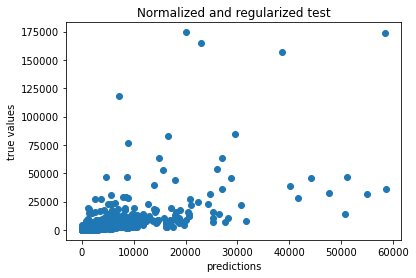

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor

#shuffle and have a certain seed



for i in lst_feat:
    
    r = shuffle(i, random_state=1311) #70
    
    print(r[:10,:])
    training = round(len(i[:,1])*0.8)
    print(training)
    #starts from 10785
    test = training
    #if only the first 3 features are selected than the mse will go down quite a bit but will still
    # be 187496069.25597447.
    
    X_train = r[:training, :9]
    X_test  = r[test:, :9]
    y_train = r[:training, 9]
    y_test  = r[test:, 9]
   
    #making two linear models
    
    #min_max_scaler = MinMaxScaler().fit(X_test)
    
    #X_norm = min_max_scaler.transform(X_train)
    
    #X_train, X_test, y_train, y_test = train_test_split(matrix_basic[:5],i[6],test_size=0.2,random_state =27)
    
    norm = MinMaxScaler()
    norm.fit(X_test)
    X_train_norm = norm.transform(X_train)

    # transform testing dataabs
    X_test_norm = norm.fit_transform(X_test)
    from scipy.stats import pearsonr
    #corr, _ = pearsonr(X_train_norm[:,4], y_train)
    #print('Pearsons correlation: %.3f' % corr)
    
    fig, ax = plt.subplots()
    #ax.scatter(X_train[:,4],y_train)
    
    linreg = LinearRegression()
    #linreg = RandomForestRegressor(n_estimators=1200, random_state=0)
    linreg.fit(X_train_norm,y_train)
    #print("score" + str((linreg.score(X_train,y_train))))
    
    y_pred = linreg.predict(X_test_norm)
        
    #source https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
    
      
    y_predxreg = []
    y_truexreg = []
        
    #does it go wrong here? # the base of regularization = 10
    #print(y_pred[:100])
    for j in y_pred:
        l = (math.e ** j) - 1
        y_predxreg.append(l)
    #print(y_test[:100])        
    for k in y_test:
        l2 = (math.e ** k) - 1
       
        y_truexreg.append(l2)
    
    ax.scatter(y_predxreg,y_truexreg)
    ax.set_ylabel("true values")
    ax.set_xlabel("predictions")
    ax.set_title("Normalized and regularized test")
    #ax.axis("equal")
    
    from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
    #the msq is super large, because of a prediction that is of the chart.
    print("msq log error = " + str(mean_squared_log_error(y_truexreg, y_predxreg)))
    print("msqe = " + str(mean_squared_error(y_truexreg, y_predxreg)))
    print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg))
    
    
    
print(len(y_truexreg))   
#for i in   

In [137]:
#here you can see the value of test and value. 
print(max(y_truexreg))
lw = []
o = 0
p = 0
for i in range(len(y_truexreg)):
    
    #if p == 0:
        #lw.append(-90000000000)
    p = p + 1
    if y_truexreg[i] == 344715.15:
        o=i
    
    print("this is test vs pred:" + str(y_truexreg[i]) + "   " + str(y_predxreg[i]))
    lw.append((y_truexreg[i]-y_predxreg[i])**2)
print(o)
print(X_test[o])
print(y_test[o])
print(10**5.537461630642007 + 1)
print(10**4.32450852 + 1)
print(np.sqrt(np.sum(lw)/3335))

174435.38999999984
this is test vs pred:19.919999999999998   29.80423150200185
this is test vs pred:11082.679999999995   8724.390150826039
this is test vs pred:67.27499999999998   48.54519754715833
this is test vs pred:48.91199999999999   99.58390987163413
this is test vs pred:1310.4699999999993   1120.620061970298
this is test vs pred:46.53199999999999   30.64839895474581
this is test vs pred:598.2599999999995   506.2196443754115
this is test vs pred:340.6999999999998   227.50162980383925
this is test vs pred:133.55200000000002   160.47487963171736
this is test vs pred:44.054999999999986   66.70738064367252
this is test vs pred:103.74899999999998   1293.0111903414022
this is test vs pred:318.03499999999997   502.72709950782314
this is test vs pred:413.8799999999998   27.04070604009839
this is test vs pred:14.449000000000002   77.81235810721525
this is test vs pred:2106.631999999999   2414.54050929816
this is test vs pred:1168.0829999999992   1240.264984715343
this is test vs pred:40.2

this is test vs pred:1208.3714999999997   1757.8654698619384
this is test vs pred:42.126   62.529265316217966
this is test vs pred:2124.849999999999   1157.7051070654438
this is test vs pred:124.31999999999996   72.73211608690545
this is test vs pred:90.895   82.79944608830405
this is test vs pred:64.155   14.160193777655444
this is test vs pred:569.9663999999997   1451.30614887417
this is test vs pred:451.32449999999994   1084.4993288732214
this is test vs pred:248.73599999999993   163.68687298984244
this is test vs pred:3591.259999999996   7721.194057622063
this is test vs pred:669.9014999999997   700.24007040061
this is test vs pred:21.825999999999993   17.108488385256468
this is test vs pred:88.94969999999994   49.237036645336836
this is test vs pred:109.62299999999998   109.84924434061915
this is test vs pred:51.67499999999998   68.09758056565506
this is test vs pred:2078.0099999999998   1128.5689968120648
this is test vs pred:1216.98   2199.673448385512
this is test vs pred:395.9

this is test vs pred:2977.828999999998   5471.456364837145
this is test vs pred:185.11399999999998   612.0593164835624
this is test vs pred:40.53139999999999   99.90848630569879
this is test vs pred:694.5599999999997   474.55005541100087
this is test vs pred:139.55999999999992   95.67285258596092
this is test vs pred:10.7093   32.6131461369971
this is test vs pred:773.3982599999997   319.120932808388
this is test vs pred:1153.9799999999998   644.359791124094
this is test vs pred:66.46499999999999   27.812762379298544
this is test vs pred:49.46249999999999   27.668032056158022
this is test vs pred:220.80999999999997   110.51599179635575
this is test vs pred:506.14779999999996   1789.2732035296988
this is test vs pred:790.4400000000002   1399.7224220690453
this is test vs pred:388.82621359223316   348.7693338917383
this is test vs pred:28.236   49.003728436049165
this is test vs pred:479.0889999999998   336.28929407477426
this is test vs pred:49.194999999999986   83.82427575807357
this i

As you can see there is still something wrong with the predictions since sometimes the prediction is just way off the chart. Below there will be a simple neural network trying to predict the price. 

H:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


msq1 = 30140772.0897525
msq1, still regularized = 0.6493187402111175
Coefficient of determination: 0.51


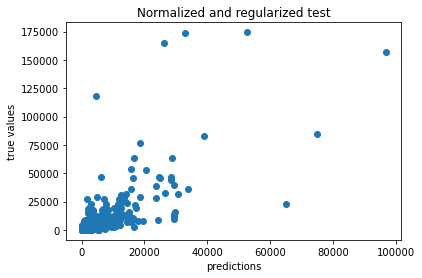

In [138]:
from sklearn.neural_network import MLPRegressor
for i in lst_feat:
        clf3 = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15, 10), random_state=40,max_iter=2500)
        clf3.fit(X_train_norm, y_train)
        y_hat_test_n = clf3.predict(X_test_norm)
        
        y_predxreg2 = []
        
        
        for r in y_hat_test_n:
            #l = math.e ** i - 1
            l3 = math.e ** r - 1
            y_predxreg2.append(l3)
        
        
        
        print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg2)))
        print("msq1, still regularized = " + str(mean_squared_error(y_test, y_hat_test_n)))
        print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg2))
        
        fig, ax2 = plt.subplots()
        ax2.scatter(y_predxreg2,y_truexreg)
        ax2.set_ylabel("true values")
        ax2.set_xlabel("predictions")
        ax2.set_title("Normalized and regularized test")

msq1 = 38281709.11182173
Coefficient of determination: 0.37


Text(0.5, 1.0, 'Normalized and regularized test')

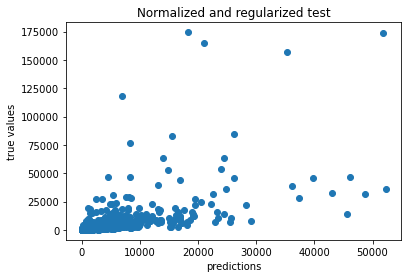

In [139]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=42,alpha=0.001)
regr.fit(X_train_norm, y_train)
y_pred3 = regr.predict(X_test_norm)
        
#source https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
    
      
y_predxreg3 = []
y_truexreg3 = []
        
 #does it go wrong here? # the base of regularization = 10
#print(y_pred[:100])
for j in y_pred3:
    l = (math.e ** j) - 1
    y_predxreg3.append(l)
    #print(y_test[:100])        
for k in y_test:
    l2 = (math.e ** k) - 1
    y_truexreg3.append(l2)

print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg3)))
print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg3))

fig, ax3= plt.subplots()
ax3.scatter(y_predxreg3,y_truexreg)
ax3.set_ylabel("true values")
ax3.set_xlabel("predictions")
ax3.set_title("Normalized and regularized test")

msq1 = 23332609.123607352
Coefficient of determination: 0.62


Text(0.5, 1.0, 'Normalized and regularized test')

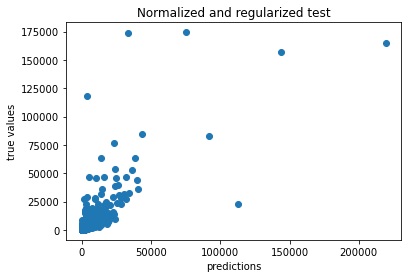

In [140]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=600, random_state=0)

regressor.fit(X_train_norm, y_train)
y_pred4 = regressor.predict(X_test_norm)
        
#source https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
    
      
y_predxreg4 = []
y_truexreg4 = []
        
 #does it go wrong here? # the base of regularization = 10
#print(y_pred[:100])
for j in y_pred4:
    l = (math.e ** j) - 1
    y_predxreg4.append(l)
    #print(y_test[:100])        
for k in y_test:
    l2 = (math.e** k) - 1
    y_truexreg4.append(l2)

print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg4)))
print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg4))


fig, ax4 = plt.subplots()
ax4.scatter(y_predxreg4,y_truexreg)
ax4.set_ylabel("true values")
ax4.set_xlabel("predictions")
ax4.set_title("Normalized and regularized test")

I am still not sure where the fault and mistake is. Below I will add other features that can be used for further models.

In [117]:
from collections import Counter

#feature_extra_1 

#add buy guy with unique number if he did more than 15 buys
dictbuy = dict()
count22 = 0
count33 = 1
coun = Counter(buyer_sales)


for i in buyer_sales:
    
    if i in dictbuy.keys():
            #matrix[count2][3] = dictbuy[i]
            count22 = count22 + 1
    else:
        dictbuy[i] = count33
        #matrix[count2][3] = dictbuy[i]
        count33 = count33 + 1
        count22 = count22 + 1
 #checl whether counter of number is higher then 15
dict_buy15 = dict()
count_2_1 = 2
other = 1
for i in dictbuy.keys():
    if coun[i] >= 15:
        dict_buy15[i] = count_2_1
        count_2_1 = count_2_1 + 1
    else:
        dict_buy15[i] = other       

#dict_buy15 is a dictionary that could be added to the matrix

#feature_extra_2

#add sale guy with unique number if he did more than 15 sales        
dictsell = dict()
count4 = 0
count5 = 1
for i in seller_sales:
    if i in dictsell.keys():
        #matrix[count4][4] = dictsell[i]
        count4 = count4 + 1
    else:
        dictsell[i] = count5
        #matrix[count4][4] = dictsell[i]
        count4 = count4 + 1
        count5 = count5 + 1      

coun2 = Counter(seller_sales)

dict_sell15 = dict()
count2_2_1 = 2
other2 = 1
for i in dictsell.keys():
    if coun2[i] >= 15:
        dict_sell15[i] = count2_2_1
        count2_2_1 = count2_2_1 + 1
    else:
        dict_sell15[i] = other2 

#dict_sell15 is a dictionary that could be added to the matrix

#feature_extra_2
#add rates
count6 =0
r224 = []
for i in rate_sales:
    r224.append(i)
    count6 = count6 + 1
for l in range(len(r224)):
    matrix_basic[l][6]

In [118]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)

